In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

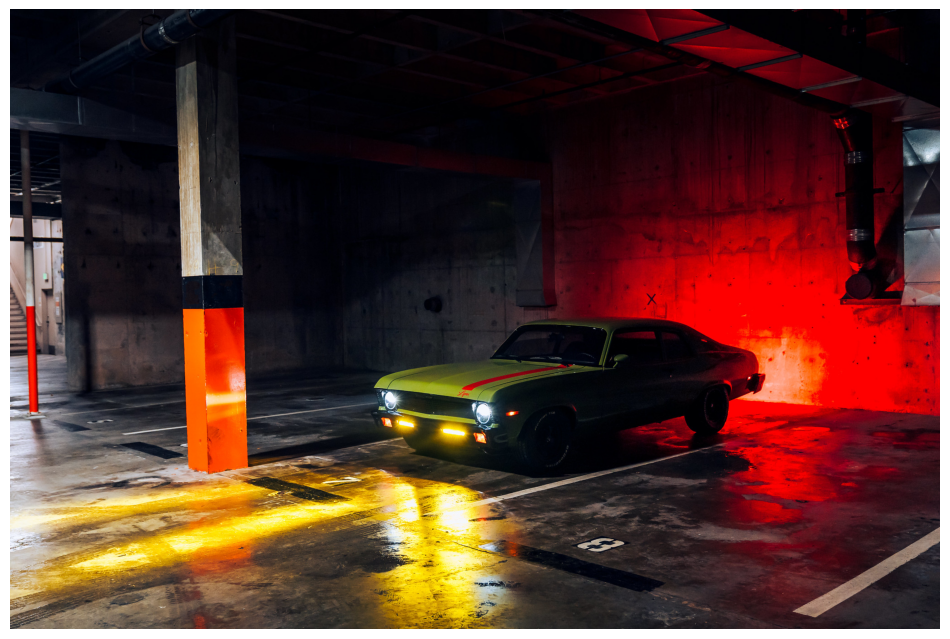

In [7]:
image = img.imread('dodge.jpg') 
plt.figure(figsize=(12,10))
plt.axis('off')
plt.imshow(image)

image in frequency domain

converts an image to its frequency domain representation using a Fourier Transform, revealing the different frequencies (patterns of variation in brightness) that compose the original image.
It then applies a logarithmic scale to the magnitudes of these frequencies to make the wide range of values more visually interpretable.
Finally, it displays this frequency domain image in grayscale, with brighter areas indicating stronger or more dominant frequencies within the original image. This visualization helps understand the image's structural and textural composition beyond what is visible in the spatial domain.

In [9]:
F = np.fft.fft2(img)
plt.imshow(np.log1p(np.abs(F)),cmap='gray')
plt.axis('off')
plt.show()


IndexError: cannot do a non-empty take from an empty axes.


Shifiting low frequency component to centere of the image

Shifts Frequencies: Moves the low-frequency components of the image's Fourier Transform to the center of the spectrum for easier analysis.
Enhances Visibility: Applies logarithmic scaling to the magnitudes of frequencies to improve the visibility of details across a wide range of values.
Displays Image: Shows the shifted and scaled frequency domain representation as a grayscale image, highlighting the structure and texture information encoded in the frequencies.

In [10]:
Fshift = np.fft.fftshift(F)
plt.imshow(np.log1p(np.abs(Fshift)),cmap='gray')
plt.axis('off')
plt.show()

NameError: name 'F' is not defined

Filter: Low pass filter

creates a circular shape that acts as a filter to only let through the smoother parts of an image, while blocking the more detailed, sharp parts. It visualizes this filter as a white circle on a black background, where the circle represents the part of the image that will remain clear.
often used for noise reduction, blurring

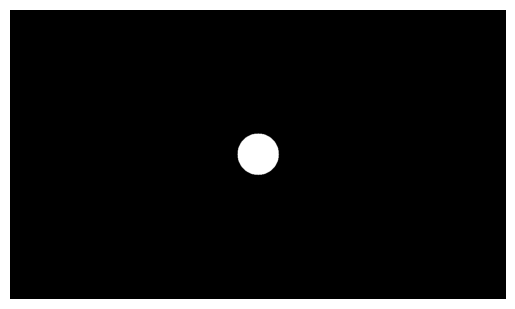

In [6]:
M,N = img.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 50

for u in range(M):
  for v in range(N):
    D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
    if D <= D0:
      H[u,v] = 1
    else:
      H[u,v] = 0

plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

Ideal Low Pass Filtering

process is essential in image processing for reducing noise or blurring the image, as it selectively keeps the low-frequency components that contribute to the overall form and structure of the image while eliminating high-frequency noise or details.
Brighter areas in the visualization represent stronger retained frequencies, while darker areas indicate frequencies that have been filtered out.

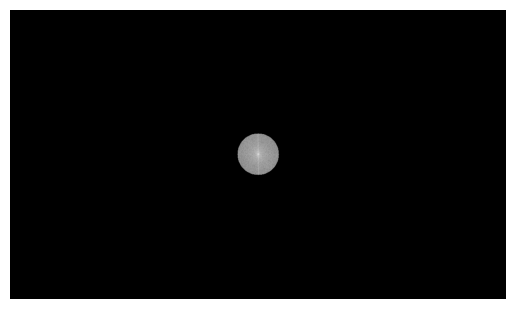

In [7]:
Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)),
cmap='gray')
plt.axis('off')
plt.show()

Inverse the shifted Fourier Transform

Inverse Shift: It applies the inverse shift (np.fft.ifftshift) to Gshift, which is the product of the frequency domain representation of the image after applying the ideal low-pass filter. This operation moves the zero-frequency component back to the original location (typically the top-left corner for FFT representations), preparing it for the inverse Fourier Transform.

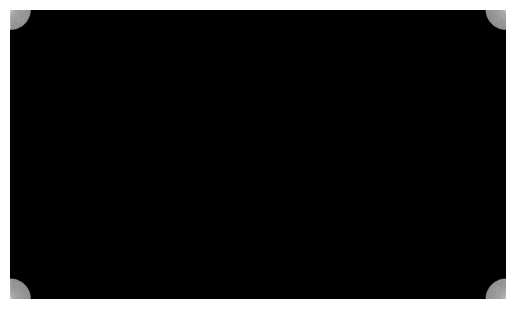

In [8]:
G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)), cmap='gray')
plt.axis('off')
plt.show()


Inverse the fourier transformation

performs the inverse Fourier transformation to convert the modified frequency domain representation (after applying a low-pass filter and shifting operations) back to the spatial domain, and then it visualizes the resulting image.
This filtered image will typically appear smoother or more blurred compared to the original, as the high-frequency components that contribute to sharp edges and fine details have been attenuated or removed by the low-pass filter.
This process is useful for demonstrating the effects of frequency domain filtering on image data, providing insights into techniques for image smoothing, noise reduction, and the fundamental role of frequency components in determining image characteristics.

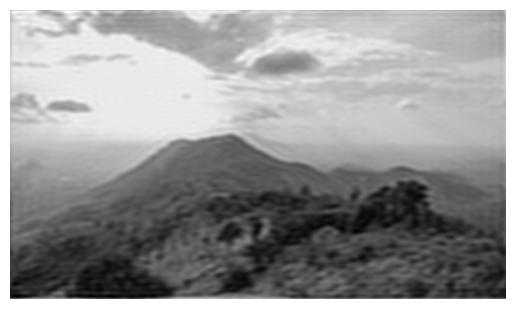

In [9]:
g = np.abs(np.fft.ifft2(G))
plt.imshow(g, cmap="gray")
plt.axis("off")
plt.show()

Filter: High pass filter

Invert Filter: By subtracting the low-pass filter matrix H from 1 (H = 1 - H), the code effectively inverts the filter. This means that areas which were previously allowing low frequencies to pass (value of 1 in H) are now blocking them (become 0), and areas that were blocking high frequencies (value of 0 in H) are now allowing them to pass (become 1).
In this visualization, the central region, which was white in the low-pass filter (indicating allowed frequencies), will now be black (indicating blocked frequencies), and the surrounding area will be white (indicating allowed frequencies). This represents the nature of a high-pass filter, which blocks low frequencies and allows high frequencies to pass.

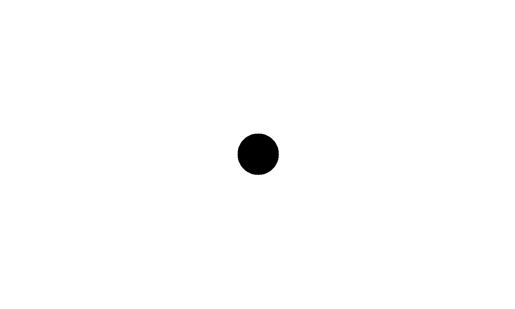

In [10]:
H = 1 - H

plt.imshow(H, cmap="gray")
plt.axis("off")
plt.show()

Ideal High Pass Filtering

This high-pass filtering process emphasizes edges, textures, and fine details in the image by removing the low-frequency components that correspond to smoother and slower varying parts of the image. Such filtering is valuable in applications like edge detection, sharpening images, or in any context where the high-frequency content of an image is of particular interest.

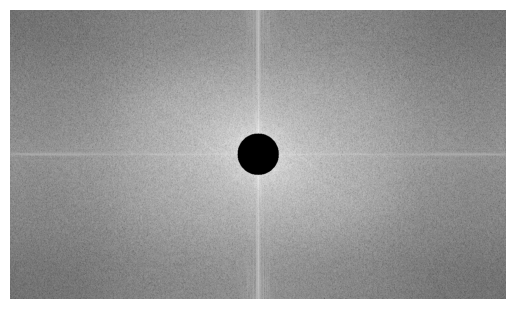

In [11]:
Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)),cmap="gray")
plt.axis("off")
plt.show()

Inverse Fourier Transform

Inverse Fourier Shift: The np.fft.ifftshift(Gshift) function is used to reverse the zero-frequency component shift that was applied to the center of the spectrum for visualization purposes. This prepares Gshift for the correct inverse Fourier transformation, moving the data back to its original layout where the zero-frequency component is at the corners.
Inverse Fourier Transform: np.fft.ifft2(G) is applied to G to perform the inverse 2D Fourier Transform, transforming the data from the frequency domain back into the spatial domain. The result is a complex array, where the real part represents the intensity values of the reconstructed image.
This image should reflect the effects of high-pass filtering, likely showing enhanced edges and fine details, with smoother areas and low-frequency components removed or significantly reduced.

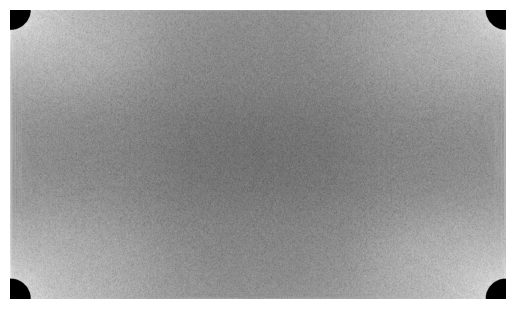

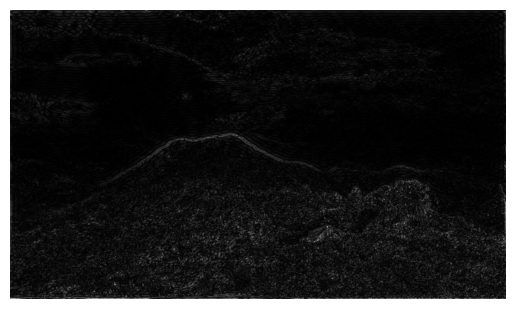

In [12]:
G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)),cmap="gray")
plt.axis("off")
plt.show()

g = np.abs(np.fft.ifft2(G))
plt.imshow(g, cmap="gray")
plt.axis("off")
plt.show()